# Position of the board
In this notebook we develop some code to identify the position on the chessboard.

## Imports

In [1]:
run -i ../scripts/standardimports

## User Settings

In [2]:
image_path = "../images/empty-boards/empty-4.jpg"

bool_plot = True
bool_save = False

## Setup

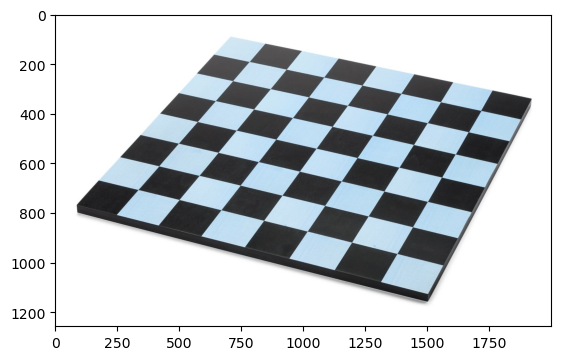

In [3]:
img = cv2.imread(image_path)
plt.imshow(img)

## Positioning

### Outline
Based on the previous tests we've decided to use the `cv2.canny` algorithm for now. It requires some fine tuning for the hyper-parameters, but we'll do that by hand for now and optimize the process later. For now we focus on showing that when we have a good outline, then we can indeed detect the board.

Text(0.5, 1.0, 'Canny')

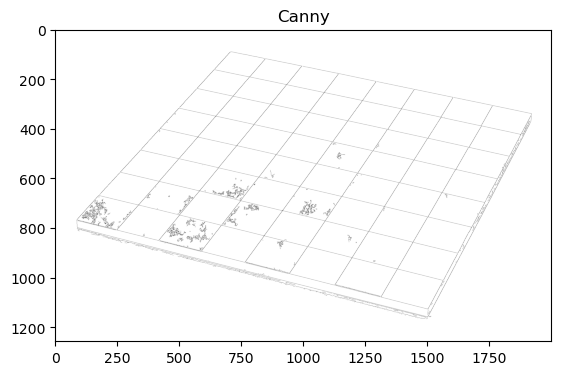

In [4]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Canny Edge Detection
canny = cv2.Canny(image=img_blur, threshold1=10, threshold2=55) # Canny Edge Detection

# plotting
plt.imshow(canny, cmap='Greys') 
plt.title("Canny")

The `cv2.Canny` output has the following properties:

In [5]:
print("shape:           ", canny.shape)
print("min value:       ", np.min(canny))
print("max value:       ", np.max(canny))
print("data type:       ", canny.dtype)
print("unique entries:  ", np.unique(canny))
print("non-zero entries:", np.where(canny != 0)[0].shape[0])

shape:            (1257, 2000)
min value:        0
max value:        255
data type:        uint8
unique entries:   [  0 255]
non-zero entries: 37881


That's actually perfect because it has only two unique entries: 0 and 255.

### Cut it down: cropping
As a first step we remove all the whitespace around the image such that the edges touche the border on all sides.

In [6]:
len_y_canny, len_x_canny = canny.shape

In [7]:
norms_horizontal = la.norm(canny, axis = 1)
norms_vertical = la.norm(canny, axis = 0)

cut_left = (norms_vertical!=0).argmax(axis=0)
cut_right = len_x_canny-(norms_vertical!=0)[::-1].argmax(axis=0)

cut_top = (norms_horizontal!=0).argmax(axis=0)
cut_bottom = len_y_canny-(norms_horizontal!=0)[::-1].argmax(axis=0)

In [8]:
test = [norms_vertical[cut_left] != 0,
        norms_vertical[cut_left-1] == 0,
        norms_vertical[cut_right-1] != 0,
        norms_vertical[cut_right] == 0,
        norms_horizontal[cut_top] != 0,
        norms_horizontal[cut_top-1] == 0,
        norms_horizontal[cut_bottom-1] != 0,
        norms_horizontal[cut_bottom] == 0]
print("Sanity check:", test)

Sanity check: [True, True, True, True, True, True, True, True]


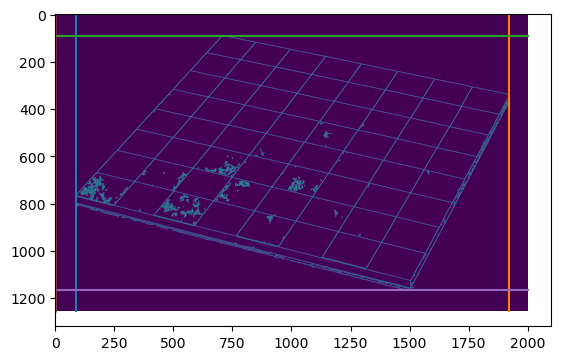

In [9]:
plt.imshow(canny)
plt.plot([cut_left, cut_left], [0, len_y_canny])
plt.plot([cut_right-1, cut_right-1], [0, len_y_canny])
plt.plot([0, len_x_canny], [cut_top, cut_top], [0, len_y_canny])
plt.plot([0, len_x_canny], [cut_bottom-1, cut_bottom-1], [0, len_y_canny])

In [10]:
crop = canny[:, cut_left:cut_right]
crop = crop[cut_top : cut_bottom, :]

Text(0.5, 1.0, 'cropped image')

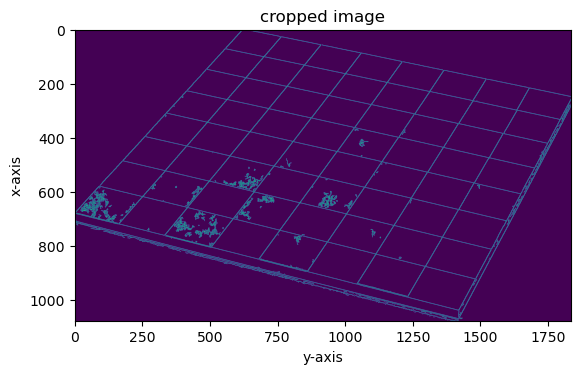

In [11]:
fig, ax = plt.subplots(1,1)
plt.imshow(crop)
ax.set_xlabel("y-axis")
ax.set_ylabel("x-axis")
ax.set_title("cropped image")

In [12]:
test = np.array([la.norm(crop[:, 0]), la.norm(crop[:, -1]), la.norm(crop[0, :]), la.norm(crop[:, 1])])
print("Sanity check:", (test != 0).all())

Sanity check: True


In [13]:
len_x, len_y = crop.shape
print("crop.shape = ({}, {})".format(len_x, len_y))

crop.shape = (1077, 1835)


### Edge of the board

Let's start with the boarder that's directly towards the photographer.

In [26]:
spacing = 2

In [27]:
left = crop[:, 0 + spacing]
bottom = crop[len_x - 1 - spacing, :]

left_lower = len_x - (left != 0)[::-1].argmax() - 1
#left_lower = (left != 0).argmax()
bottom_left = (bottom != 0).argmax()

test = [left[left_lower] != 0, 
        left[left_lower + 1] == 0, 
        bottom[bottom_left] != 0, 
        bottom[bottom_left -1] == 0]

print("Sanity check:", test)

Sanity check: [True, True, True, True]


Text(0.5, 1.0, 'bottom edge of the whole board (not the play area)')

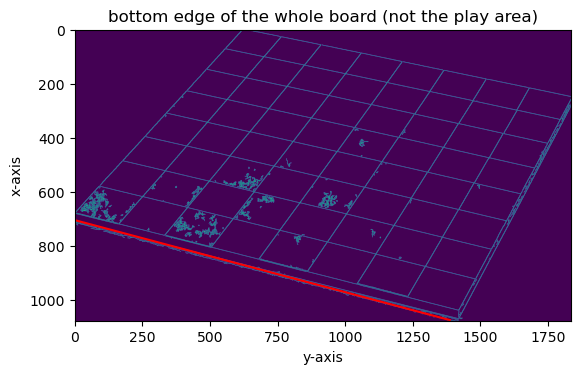

In [30]:
fig, ax = plt.subplots(1,1)

plt.imshow(crop)
plt.plot([bottom_left, 0+spacing], [len_x-1-spacing, left_lower], color = "r")

ax.set_xlabel("y-axis")
ax.set_ylabel("x-axis")
ax.set_title("bottom edge of the whole board (not the play area)")

## The End.

In [16]:
t_notebook = time.time()-tStart_notebook
print("Runtime of this notebook: {} s = {} min".format(t_notebook, t_notebook / 60))

Runtime of this notebook: 2.0279290676116943 s = 0.03379881779352824 min
